<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/ADS1_Unit04_Tutorial_4_1_Basic_Statistics_and_Statistical_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science 1 Tutorial 4
### Lecturer: Wong Kim Siong
## Basic Statistics
We will explore here some basic statistics and operations on pandas dataframes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # note this new package! used a lot in online examples
import pandas as pd

Download Files from BB (Tesco, BP, Barclays and Vodaphone) financial performance and read those financial files as before. Combine them into one dataframe

In [2]:
df_tesco = pd.read_csv('TSCO_ann.csv', index_col='year')
df_bp = pd.read_csv('BP_ann.csv', index_col='year')
df_barclays = pd.read_csv('BCS_ann.csv', index_col='year')
df_vodaphone = pd.read_csv('VOD_ann.csv', index_col='year')
companies = ('Tesco', 'BP', 'Barclays', 'Vodaphone')

for i, df in enumerate((df_tesco, df_bp, df_barclays, df_vodaphone)):
    df.rename(columns={col: f'{companies[i]} {col}' for col in df.columns}, inplace=True)

df = df_tesco.join([df_bp, df_barclays, df_vodaphone])
df.head()

,Tesco price,Tesco ann_return,BP price,BP ann_return,Barclays price,Barclays ann_return,Vodaphone price,Vodaphone ann_return
year,,,,,,,,
1989,24.494144,22.941372,41.180229,19.174906,1.571551,25.596115,4.003933,33.478386
1990,30.810261,17.814613,49.884350,-11.157063,1.973807,12.323343,5.596050,-21.962895
1991,36.818260,5.895034,44.617970,-6.082900,2.217046,-0.793578,4.492602,17.645562
1992,39.053959,5.149691,41.984802,-15.618524,2.199452,1.578620,5.359591,10.330250
1993,41.117802,-12.174125,35.913830,46.029975,2.234173,53.486592,5.942858,48.265578


Let's look at each of these columns and see some basic information about them.

Mean:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Median:
$$
\text{median} =
\begin{cases}
x_{\frac{n+1}{2}}, & \text{if } n \text{ is odd} \\
\frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

Standard deviation:
$$
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

In [3]:
# mean and median:
print(df.mean(), end='\n\n')
print(df.median(), end='\n\n')

# standard deviation
print(df.std(), end='\n\n')

# sum by column = not that meaningful
print(df.sum(axis=0), end='\n\n')

# sum by row but only just prices
df_prices = df[[col for col in df.columns if 'price' in col]].copy()
df_prices['Total'] = df_prices.sum(axis=1)
print(df_prices.Total)

Tesco price             164.413870
Tesco ann_return          7.561509
BP price                201.571405
BP ann_return             6.714966
Barclays price           10.985586
Barclays ann_return      15.326749
Vodaphone price          64.510986
Vodaphone ann_return     10.546701
dtype: float64

Tesco price             160.541336
Tesco ann_return          7.674430
BP price                214.922073
BP ann_return             7.406347
Barclays price            9.691092
Barclays ann_return       5.469468
Vodaphone price          49.015934
Vodaphone ann_return     11.465884
dtype: float64

Tesco price              98.825000
Tesco ann_return         19.519435
BP price                110.286764
BP ann_return            20.749894
Barclays price            7.700208
Barclays ann_return      46.756708
Vodaphone price          51.260722
Vodaphone ann_return     29.045485
dtype: float64

Tesco price             5425.657696
Tesco ann_return         249.529807
BP price                6651.856367
BP a

In [4]:
def plot_prices_series(df_prices):
    """
    Plots the prices of stocks and total prices by year
    """
    plt.figure(dpi=144)

    for i, col in enumerate(df_prices.columns):
        if col == 'Total':
            break
        df_prices[col].plot(label=companies[i])

    plt.plot(df_prices.Total, color='k', label='Total')

    plt.xlim(df_prices.index.min(), df_prices.index.max())
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return

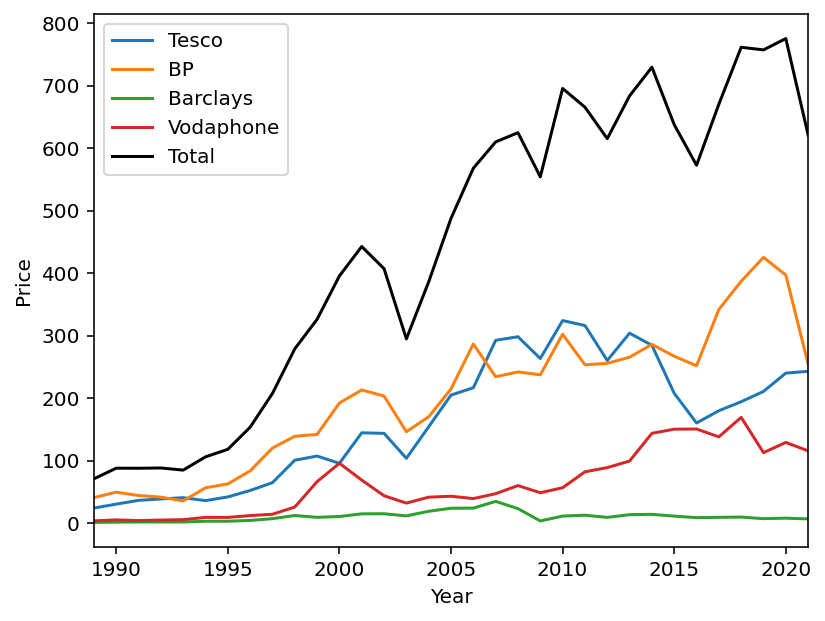

In [5]:
plot_prices_series(df_prices)

How does each stock relate to each other directly, though?

Covariance:
$$
\text{Cov}(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})
$$

In [6]:
df_prices.cov()

,Tesco price,BP price,Barclays price,Vodaphone price,Total
Tesco price,9766.380656,8677.650198,443.508580,3022.483101,21910.022536
BP price,8677.650198,12163.170225,345.370058,4699.801428,25885.991910
Barclays price,443.508580,345.370058,59.293199,69.118230,917.290068
Vodaphone price,3022.483101,4699.801428,69.118230,2627.661654,10419.064413
Total,21910.022536,25885.991910,917.290068,10419.064413,59132.368926


Covariance has large positive values if the values of x and y tend to move together.
Large negative values if they tend to move in the opposite direction.

<strong>Problem:</strong> the covariance can be large because stocks move together a lot or because the variances are high.

<strong>Solution:</strong> normalise by dividing by the standard deviations. That gives the correlation coefficient, $\rho$.

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X\sigma_Y}
$$
or:
$$
\rho_{X,Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2}\sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}
$$


$\rho$ has values between -1 and +1.
- +1: perfect correlation. Values are fixed multiples.
- -1: perfect anticorrelation
- 0: no correlation. Values are independent.

In [7]:
df_prices.corr()

,Tesco price,BP price,Barclays price,Vodaphone price,Total
Tesco price,1.000000,0.796181,0.582818,0.596640,0.911724
BP price,0.796181,1.000000,0.406686,0.831326,0.965225
Barclays price,0.582818,0.406686,1.000000,0.175108,0.489882
Vodaphone price,0.596640,0.831326,0.175108,1.000000,0.835856
Total,0.911724,0.965225,0.489882,0.835856,1.000000


Note the values on the diagonal will always be 1.
This is the *Pearson's* correlation coefficient.
It measures **linear** correlation.
It is not good measuring non-linear correlation.

*Kendall's* ranked correlation coefficient instead measures ordinal association.
- values are sorted in increasing (or decreasing order)
- if by moving from the ith value to the next and values of both columns are increasing this is counted as *concordant*.
- *discordant* if decreasing.

$$
\tau = \frac{2}{n(n-1)}\sum_{i<j}\text{sign}(X_i - X_j)\text{sign}(Y_i - Y_j)
$$


In [8]:
df_prices.corr(method='kendall')

,Tesco price,BP price,Barclays price,Vodaphone price,Total
Tesco price,1.000000,0.643939,0.454545,0.503788,0.715909
BP price,0.643939,1.000000,0.340909,0.708333,0.890152
Barclays price,0.454545,0.340909,1.000000,0.261364,0.367424
Vodaphone price,0.503788,0.708333,0.261364,1.000000,0.727273
Total,0.715909,0.890152,0.367424,0.727273,1.000000


A good way of quickly looking at some basic stats is with the *describe* function.

In [9]:
df_prices.describe()

,Tesco price,BP price,Barclays price,Vodaphone price,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,164.413870,201.571405,10.985586,64.510986,441.481846
std,98.825000,110.286764,7.700208,51.260722,243.171480
min,24.494144,35.913830,1.571551,4.003933,71.249857
25%,65.155853,120.503860,4.718605,14.598728,207.804806
50%,160.541336,214.922073,9.691092,49.015934,487.707494
75%,243.157288,265.760223,13.961011,99.705025,637.596990
max,324.262756,425.389618,35.202843,169.534927,775.208532


# Question 1
Read the *UK_cities.txt* file (hint: sep='\\s+') and check some basic statistics.
Compare the population mean and median.
Compare the Pearson's and Kendall correlations (you may need to set *numeric_only=True*).
Sum the population, grouped by their nation/region (df.groupby), and create a pie chart.

In [ ]:
## df_cities = pd.read_csv(, index_col='City')

Basic Statistics:
       Year granted    Population
count     69.000000  6.900000e+01
mean    1635.420290  2.060080e+05
std      414.280006  1.931626e+05
min      927.000000  1.841000e+03
25%     1133.000000  8.885900e+04
50%     1888.000000  1.511450e+05
75%     1951.000000  2.733690e+05
max     2012.000000  1.092330e+06

Population Mean: 206007.96
Population Median: 151145.00
→ The mean is higher, suggesting a few very large cities are skewing the data upward.

Correlation Comparisons:
Pearson Correlation:
               Year granted  Population
Year granted      1.000000    0.319573
Population        0.319573    1.000000

Kendall Correlation:
               Year granted  Population
Year granted      1.000000    0.115062
Population        0.115062    1.000000

Population by Nation/Region:
Nation/Region
England             11270697
Northern Ireland      651199
Scotland             1540250
Wales                 752403
Name: Population, dtype: int64


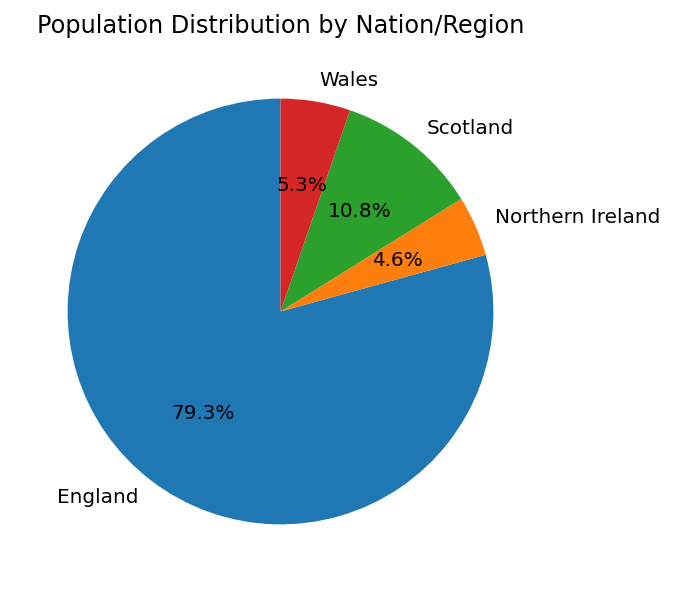

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the text file
#df_cities = pd.read_csv('UK_cities.txt', sep='\s+', index_col='City')
df_cities = pd.read_csv('UK_cities.txt', sep=r'\s+', index_col='City')


# Check basic statistics
print("Basic Statistics:")
print(df_cities.describe())

# Compare population mean and median
pop_mean = df_cities['Population'].mean()
pop_median = df_cities['Population'].median()
print(f"\nPopulation Mean: {pop_mean:.2f}")
print(f"Population Median: {pop_median:.2f}")

if pop_mean > pop_median:
    print("→ The mean is higher, suggesting a few very large cities are skewing the data upward.")
else:
    print("→ The median is higher, suggesting smaller cities dominate the dataset.")

# Compare Pearson's and Kendall correlations
print("\nCorrelation Comparisons:")
corr_pearson = df_cities.corr(method='pearson', numeric_only=True)
corr_kendall = df_cities.corr(method='kendall', numeric_only=True)
print("Pearson Correlation:\n", corr_pearson)
print("\nKendall Correlation:\n", corr_kendall)

# Sum the population grouped by nation/region
region_pop = df_cities.groupby('Nation/Region')['Population'].sum()
print("\nPopulation by Nation/Region:")
print(region_pop)

# Create a pie chart
plt.figure(dpi=144)
region_pop.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Population Distribution by Nation/Region')
plt.ylabel('')  # hide y-label for cleaner look
plt.show()

In [ ]:
##def plot_region_pie(dfgrp_region):
  ##  """
    ##Plots sum of regional cities
    ##"""
    ##return

In [12]:
import matplotlib.pyplot as plt

def plot_region_pie(dfgrp_region):
    """
    Plots sum of regional cities (population) as a pie chart.

    Parameters:
    dfgrp_region : pandas Series
        A Series with regions as the index and summed population as values.
    """
    plt.figure(dpi=144)
    dfgrp_region.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        figsize=(6, 6)
    )
    plt.title('Population Distribution by Nation/Region')
    plt.ylabel('')  # hides the default y-axis label for a cleaner chart
    plt.tight_layout()
    plt.show()

In [ ]:
##dfgrp_region = df_cities.
##plot_region_pie(dfgrp_region)

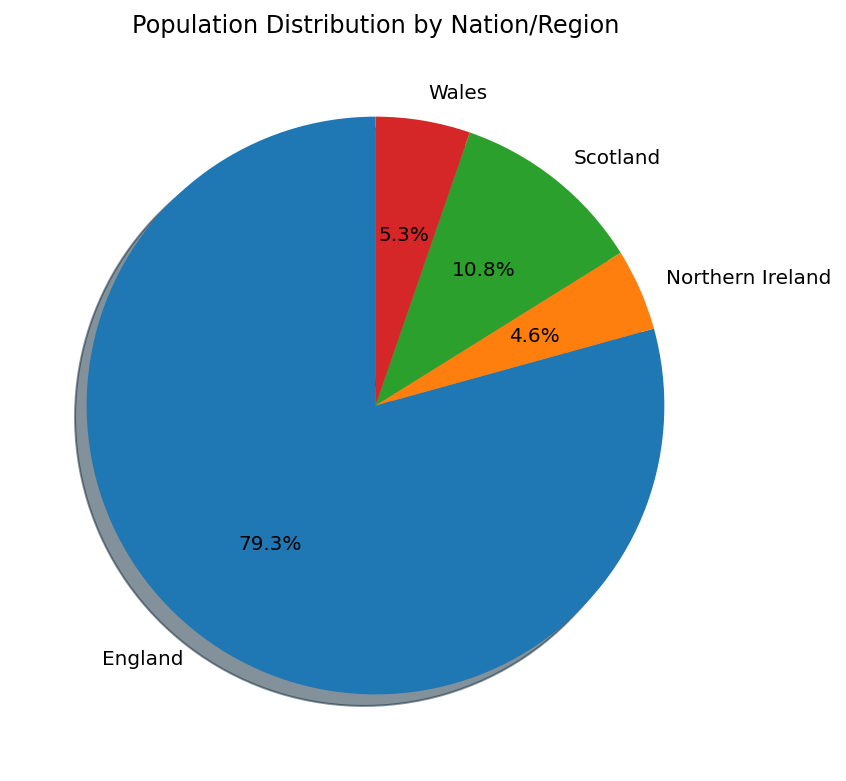

In [13]:
# Group the population by region
dfgrp_region = df_cities.groupby('Nation/Region')['Population'].sum()

# Plot the pie chart
plot_region_pie(dfgrp_region)

## End Question 1
Let's now look at some other ways of visualising these basic statistics.

## Statistical Graphs
Starting with some random data, what are the later rows in *describe* showing us?

In [14]:
sample1 = np.random.normal(1.0, 1.0, 10000)
sample2 = np.random.normal(3.0, 2.0, 10000)

In [15]:
def plot_sample_box(*samples):
    """
    Creates box plot of random samples
    """
    plt.figure(dpi=144)

    plt.boxplot(samples, labels=[f'Sample {i+1}' for i in range(len(samples))])

    plt.ylabel('Range')
    plt.show()
    return

/tmp/ipython-input-329170679.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(samples, labels=[f'Sample {i+1}' for i in range(len(samples))])


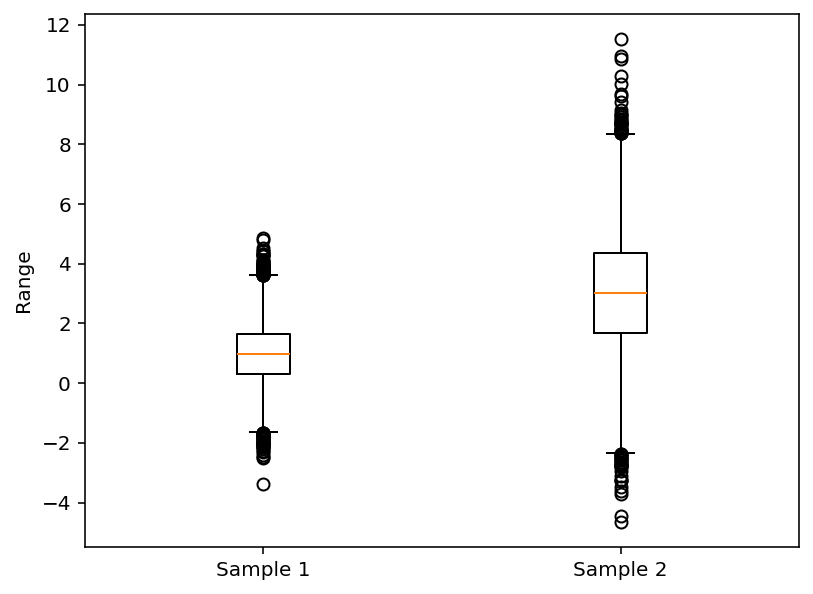

In [16]:
plot_sample_box(sample1, sample2)

The orange line is the median, the box around it is the interquartile range (25% to 75%).
By default the whiskers are 1.5X the interquartile range.
Black circles beyond this are outliers.
In data science, you will want to customise this selection and **justify** why you are selecting/rejecting data.

In [17]:
def plot_sample_violin(*samples):
    """
    Creates violin plot of random samples
    """
    plt.figure(dpi=144)

    plt.violinplot(samples)

    plt.xticks(np.arange(1, len(samples) + 1), labels=[f'Sample {i+1}' for i in range(len(samples))])
    plt.ylabel('Range')
    plt.show()
    return

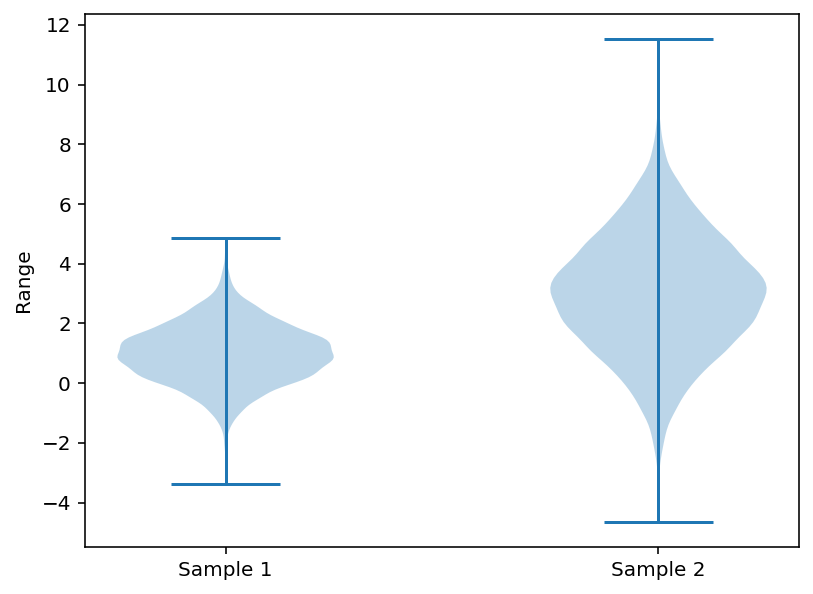

In [18]:
plot_sample_violin(sample1, sample2)

Violin plots show all of the data (this can be customised) but also shows a more meaningful representation of where the data points lie.

# Question 2
Create a boxplot and violin plot for the annual returns of the previous financial data (Tesco, BP, Barclays, Vodaphone).

In [ ]:
##df_returns =
##df_returns.head()

In [ ]:
##def plot_returns_box(df_returns):
  ##  """
    ##Plot the annual returns as a boxplot
    ##"""
    ##return

In [ ]:
##def plot_returns_violin(df_returns):
  ##  """
    ##Plot the annual returns as a violin plot
    ##"""
    ##return

In [ ]:
##plot_returns_box(df_returns)
##plot_returns_violin(df_returns)

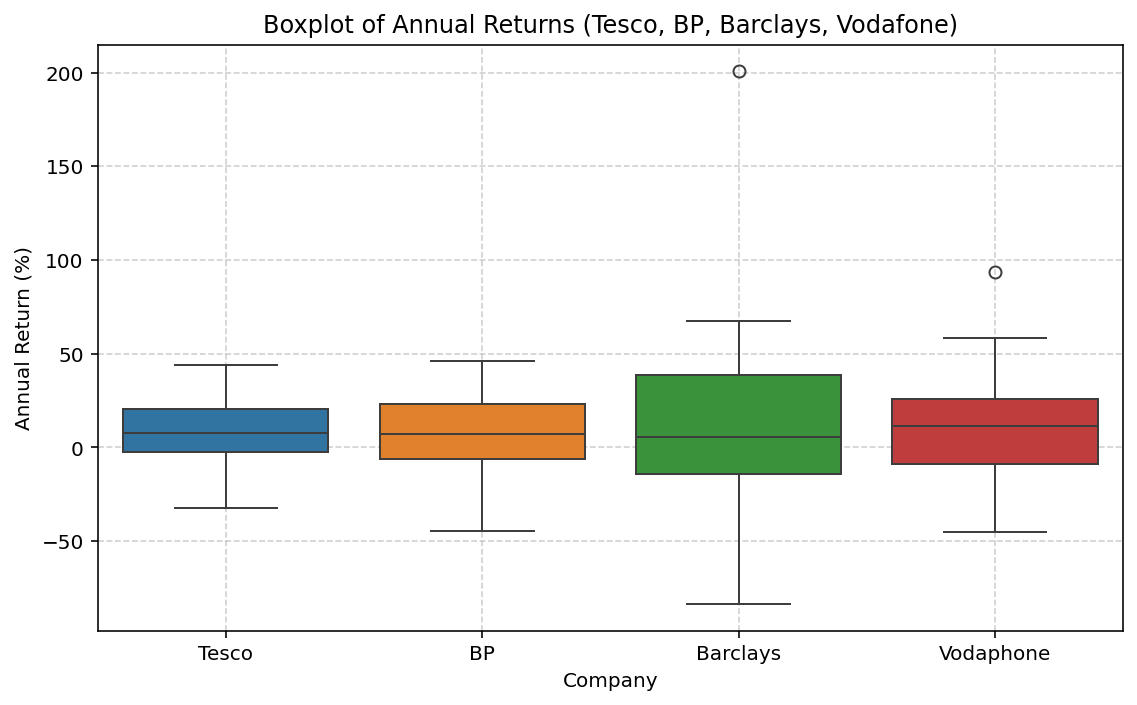

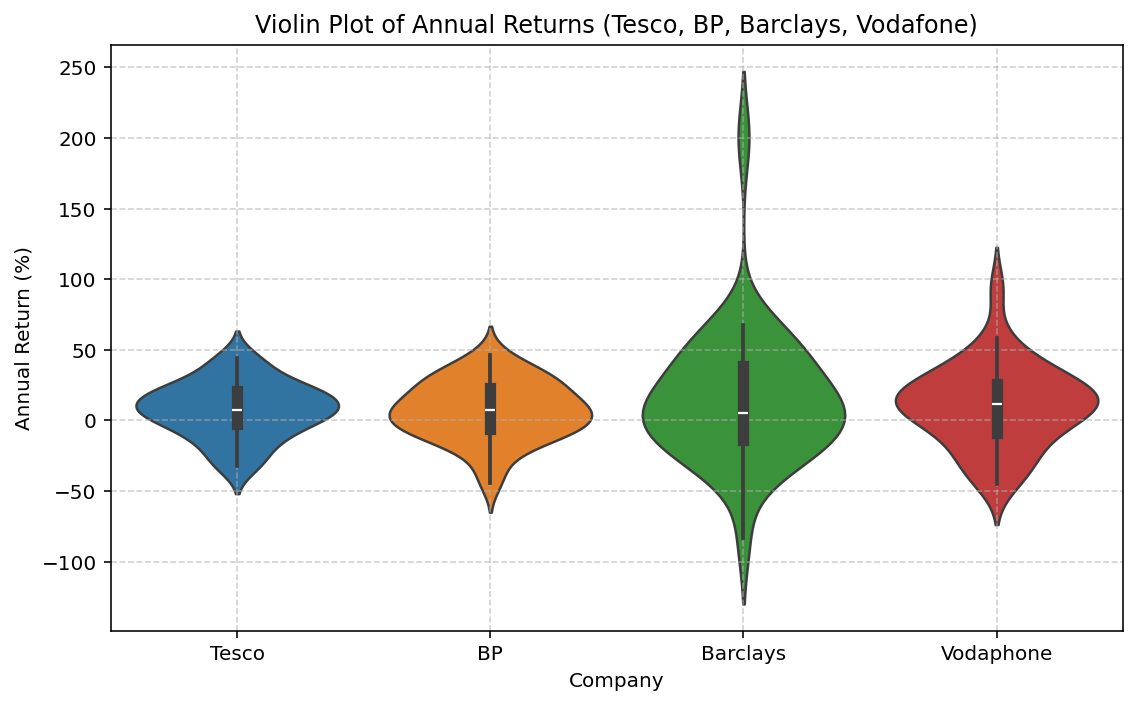

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_returns already contains annual returns for Tesco, BP, Barclays, Vodafone
# Example:
# df_returns = pd.read_csv('annual_returns.csv', index_col='Year')
# df_returns.head()

# Create df_returns by selecting the annual return columns from the original df
df_returns = df[[col for col in df.columns if 'ann_return' in col]].copy()
df_returns.columns = [col.replace(' ann_return', '') for col in df_returns.columns] # Rename columns for cleaner labels


def plot_returns_box(df_returns):
    """
    Plot the annual returns as a boxplot.
    Each company is shown as a separate box for comparison.
    """
    plt.figure(dpi=144, figsize=(8, 5))
    sns.boxplot(data=df_returns)
    plt.title("Boxplot of Annual Returns (Tesco, BP, Barclays, Vodafone)")
    plt.ylabel("Annual Return (%)")
    plt.xlabel("Company")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_returns_violin(df_returns):
    """
    Plot the annual returns as a violin plot.
    Shows distribution shape and variation in returns.
    """
    plt.figure(dpi=144, figsize=(8, 5))
    sns.violinplot(data=df_returns, inner='box')
    plt.title("Violin Plot of Annual Returns (Tesco, BP, Barclays, Vodafone)")
    plt.ylabel("Annual Return (%)")
    plt.xlabel("Company")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Display plots
plot_returns_box(df_returns)
plot_returns_violin(df_returns)

## End Question 2
What about our correlations, how can we visualise those?

In [22]:
def plot_price_correlation(df_prices, method):
    """
    Plots correlation of prices with different methods
    """
    fig, ax = plt.subplots(dpi=144)

    mask = np.triu(np.ones_like(df_prices.corr()))
    sns.heatmap(df_prices.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    plt.show()
    return

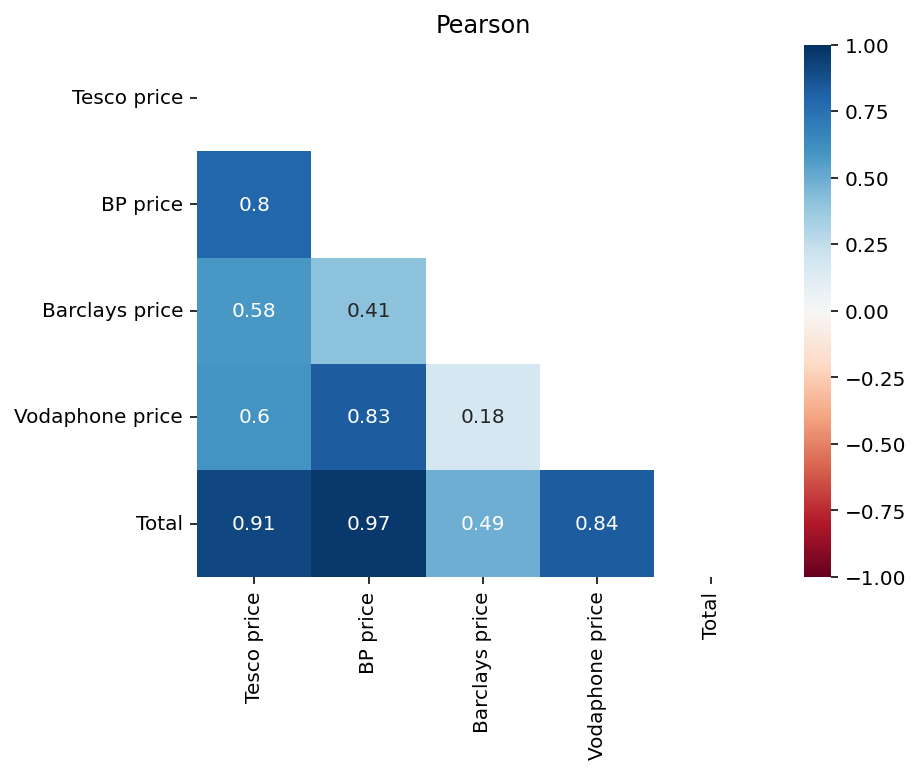

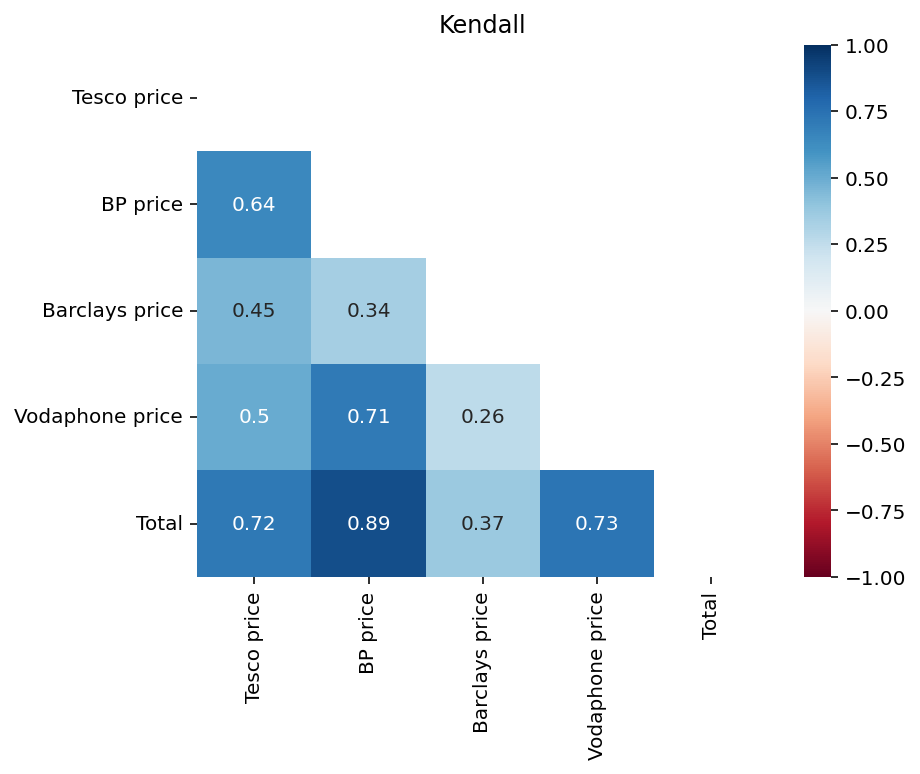

In [23]:
plot_price_correlation(df_prices, 'pearson')
plot_price_correlation(df_prices, 'kendall')

# Question 3
Create both types of correlations as heatmaps for the annual returns financial data (including a total), grouped by decade, between 1990 and 2019.

In [ ]:
##def plot_returns_correlation(dfgrp_returns, method):
  ##  """
    ##Plots correlation of returns with different methods
    ##"""
    ##return

In [ ]:
##df_returns_cut =
##dfgrp_returns_decade =

##for decade, dfgrp_returns in dfgrp_returns_decade:
    ##plot_returns_correlation(dfgrp_returns, 'pearson')
    ##plot_returns_correlation(dfgrp_returns, 'kendall')

Decade: 1990s


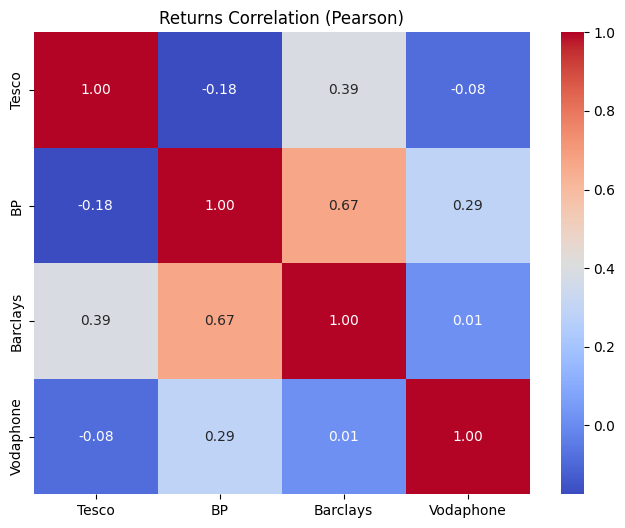

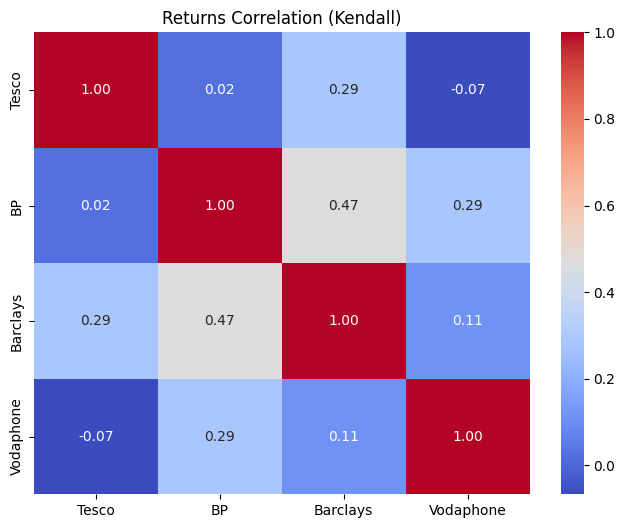

Decade: 2000s


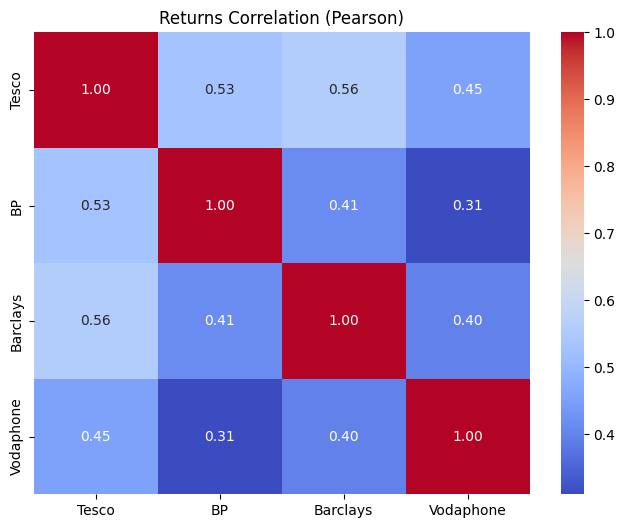

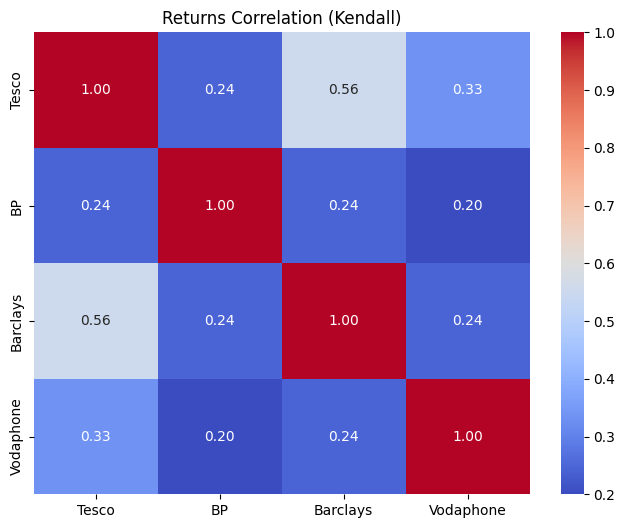

Decade: 2010s


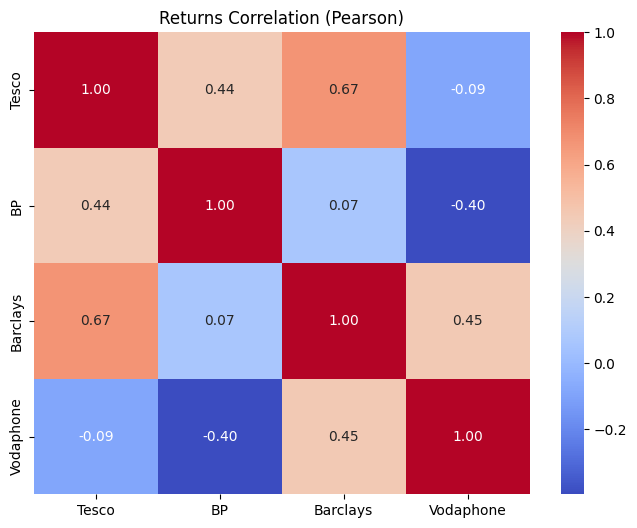

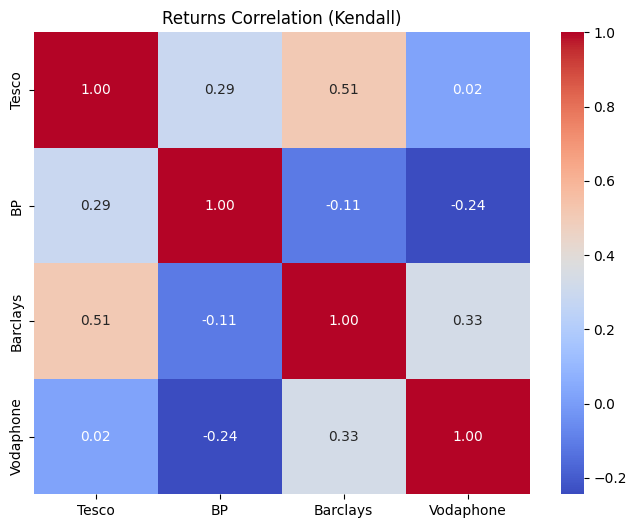

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the index to datetime objects to enable year extraction
df_returns.index = pd.to_datetime(df_returns.index, format='%Y')

# Cut df_returns to years 1990-2019
df_returns_cut = df_returns[(df_returns.index.year >= 1990) & (df_returns.index.year <= 2019)].copy()

# Function to assign decade
def get_decade(year):
    return (year // 10) * 10

# Add a 'Decade' column
df_returns_cut['Decade'] = df_returns_cut.index.year.map(get_decade)

# Group by decade
dfgrp_returns_decade = df_returns_cut.groupby('Decade')

# Function to plot correlation heatmap
def plot_returns_correlation(dfgrp_returns, method):
    """
    Plots correlation of returns with different methods
    """
    corr = dfgrp_returns.corr(method=method)

    # Add a 'Total' column and row showing mean correlations
    # corr['Total'] = corr.mean(axis=1)
    # total_row = corr.mean(axis=0)
    # total_row.name = 'Total'
    # corr = corr.append(total_row)

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f'Returns Correlation ({method.capitalize()})')
    plt.show()

# Loop through each decade and plot correlations
for decade, dfgrp_returns in dfgrp_returns_decade:
    print(f"Decade: {decade}s")
    plot_returns_correlation(dfgrp_returns.drop(columns='Decade'), 'pearson')
    plot_returns_correlation(dfgrp_returns.drop(columns='Decade'), 'kendall')

## End Question 3